C:\Users\antho\AppData\Local\Temp\ipykernel_29756\2924816247.py:45: FutureWarning: ['sample'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = df.groupby('group').agg(['mean', 'std'])


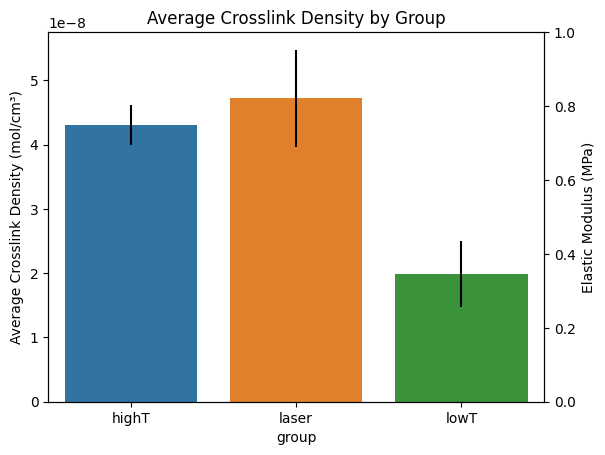

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('high-low-oven.csv', delimiter='\t', header = 0)

# Define the constants
phi_hexane = 0.39  # interaction parameter for hexane/PDMS
V_hexane_molar = 130.7  # molar volume for hexane, in mL/mol
rho_hexane = 0.659  # density of hexane, in g/mL
R = 8.3145  # universal gas constant, in J/(mol·K)
T = 298.15  # absolute temperature, in K

# Convert density to g/cm^3 (same units as molar volume)
rho_hexane = rho_hexane * 1e-3  # g/cm^3

# Calculate mass of hexane absorbed by the polymer
M_hexane = df['wash'] - df['pre-wash']  # g

# Calculate volume of hexane absorbed by the polymer
V_hexane = M_hexane / rho_hexane  # cm^3

# Calculate polymer volume fraction
V_poly = df['pre-wash'] / (df['pre-wash'] + phi_hexane * V_hexane)

# Calculate n for each sample
n = - (np.log(1-V_poly) + V_poly + phi_hexane * V_poly**2) / (V_hexane_molar * (V_poly**(1/3) - V_poly / 2))

# Calculate E in Pa for each sample
E = 3 * n * R * T

# Convert E from Pa to MPa
E = E * 1e-6  # MPa

# Add the calculated n and E to the dataframe
df['n'] = n
df['E'] = E

# Extract the group name from the sample name
df['group'] = df['sample'].apply(lambda x: x.split('_')[0])

# Calculate the average and standard deviation for each group
grouped = df.groupby('group').agg(['mean', 'std'])

# Plot the results
fig, ax1 = plt.subplots()

# Use seaborn to plot the crosslink density with error bars
sns.barplot(x=grouped.index, y=grouped['n']['mean'], yerr=grouped['n']['std'], ax=ax1, capsize=0.1)

ax1.set_ylabel('Average Crosslink Density (mol/cm³)')
ax1.set_title('Average Crosslink Density by Group')

ax2 = ax1.twinx()
ax2.set_ylabel('Elastic Modulus (MPa)')

plt.show()